# Explore Dataset - Homework exercice 2 (Programming task)

## Introduction

****

### Inspiration:

****

### Authors:

**Grupo: 5** 
- André Moreira, 62058
- Catarina Silva, 76399
- Luís Marques, 81526


In [71]:
#Import Pandas library
import pandas as pd

#Import Numpy library
import numpy as np

#Import Plotly library
import plotly.express as px

#Import Matplotlib library
import matplotlib.pyplot as plt

#Import Seaborn library
from pylab import rcParams
import seaborn as sb

#Import Scipy's Pearson Correllation function
import scipy
from scipy.stats.stats import pearsonr

#Import SKlearn Scaler, PCA & KPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

In [35]:
#Define plot libraries settings
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## Load dataset

In [36]:
file = './dataset/magic04.data'

dataset = pd.read_csv(file)

dataset.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'f3MTrans', 'fAlpha', 'fDist', 'class']

In [37]:
dataset

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,f3MTrans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


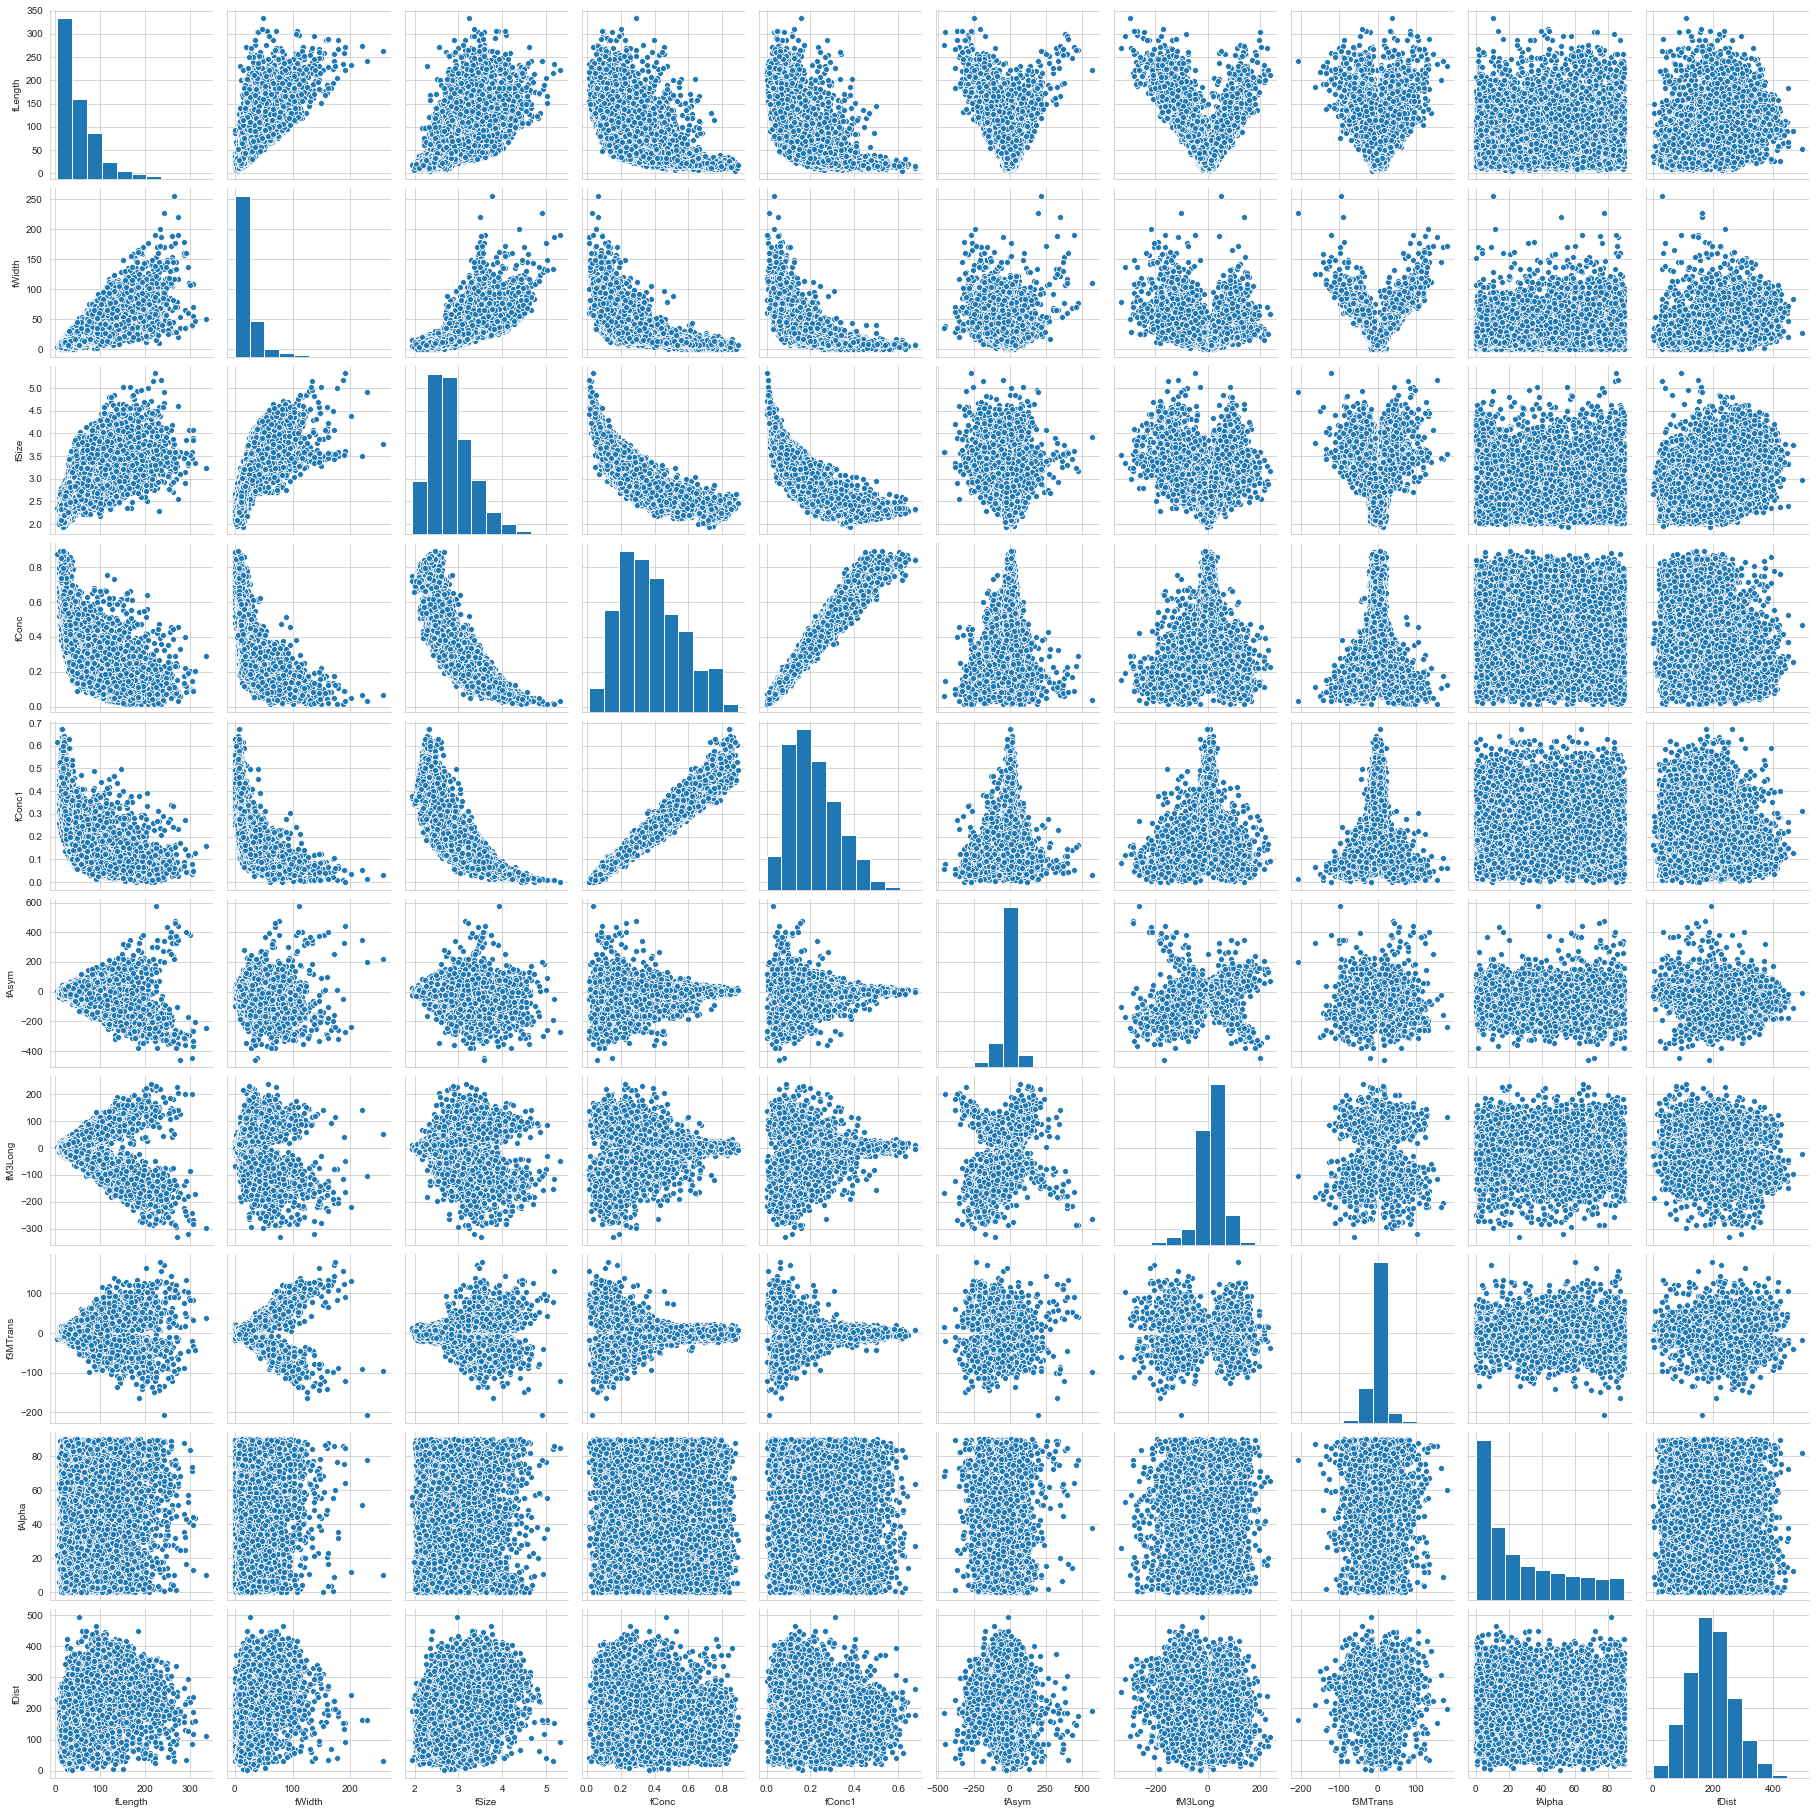

In [38]:
sb.pairplot(dataset)

## Use Pearson’s correlation coefficient to chose the best features

In [39]:
corr = dataset.corr()
corr

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,f3MTrans,fAlpha,fDist
fLength,1.000000,0.770511,0.702451,-0.631003,-0.598155,-0.368546,-0.119742,0.013377,-0.008763,0.418449
fWidth,0.770511,1.000000,0.717515,-0.609779,-0.581145,-0.266954,-0.176231,0.039737,0.066070,0.336810
fSize,0.702451,0.717515,1.000000,-0.850852,-0.808842,-0.159854,0.095162,0.015447,-0.186667,0.437038
fConc,-0.631003,-0.609779,-0.850852,1.000000,0.976413,0.112271,-0.121900,-0.011293,0.235272,-0.328347
fConc1,-0.598155,-0.581145,-0.808842,0.976413,1.000000,0.100164,-0.118767,-0.010969,0.229804,-0.304655
fAsym,-0.368546,-0.266954,-0.159854,0.112271,0.100164,1.000000,0.274041,0.002564,-0.055703,-0.206701
fM3Long,-0.119742,-0.176231,0.095162,-0.121900,-0.118767,0.274041,1.000000,-0.017192,-0.186282,0.037045
f3MTrans,0.013377,0.039737,0.015447,-0.011293,-0.010969,0.002564,-0.017192,1.000000,0.004669,0.011395
fAlpha,-0.008763,0.066070,-0.186667,0.235272,0.229804,-0.055703,-0.186282,0.004669,1.000000,-0.220532
fDist,0.418449,0.336810,0.437038,-0.328347,-0.304655,-0.206701,0.037045,0.011395,-0.220532,1.000000


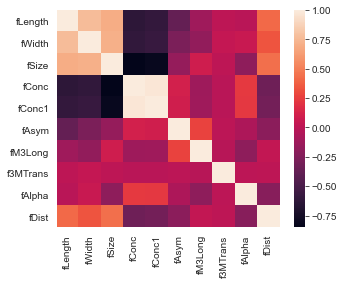

In [40]:
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [41]:
fLength = dataset['fLength']
fWidth = dataset['fWidth']

pearsonr_coefficient, p_value = pearsonr(fLenght, fWidth)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

NameError: name 'fLenght' is not defined

In [ ]:
sb.pairplot([fLength, fWidth])

## Dimension Reduction

### PCA

In [59]:
#Numerical Features
features = dataset.columns
features = features.delete(len(features)-1)

# Separating out the features
x = dataset.loc[:, features].values

# Separating out the target
y = dataset.loc[:,['class']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [68]:
#PCA nº columns
pca = PCA(n_components=2)

#Get Best Features throw PCA
principalComponents = pca.fit_transform(x)

#Resolve info into DataFrame
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Best Feature 1', 'Best Feature 2'])

In [69]:
#Append Categorical Feature
finalDf = pd.concat([principalDf, dataset[['class']]], axis = 1)

In [70]:
#Show DataFrame
finalDf

,Best Feature 1,Best Feature 2,class
0,-1.679975,-0.549293,g
1,5.966091,1.831418,g
2,-2.557074,-0.031676,g
3,1.655783,-0.553008,g
4,0.804463,-1.575724,g
...,...,...,...
19014,-2.189674,-0.346056,h
19015,-1.857731,0.695683,h
19016,2.763859,-0.491154,h
19017,4.647091,2.310538,h


### KPCA

In [75]:
#KPCA nº columns
kpca = KernelPCA(n_components=2, kernel='linear')

#Get Best Features throw KPCA
transformer  = kpca.fit_transform(x)

#Resolve info into DataFrame
kpcaDf = pd.DataFrame(data = transformer
             , columns = ['Best Feature 1', 'Best Feature 2'])

In [76]:
#Append Categorical Feature
kpcaDf = pd.concat([kpcaDf, dataset[['class']]], axis = 1)

In [78]:
#Show DataFrame
kpcaDf

,Best Feature 1,Best Feature 2,class
0,-1.679975,-0.549293,g
1,5.966091,1.831418,g
2,-2.557074,-0.031676,g
3,1.655783,-0.553008,g
4,0.804463,-1.575724,g
...,...,...,...
19014,-2.189674,-0.346056,h
19015,-1.857731,0.695683,h
19016,2.763859,-0.491154,h
19017,4.647091,2.310538,h


## KPCA (RBF kernel)

In [79]:
#KPCA nº columns
rbf_kpca = KernelPCA(n_components=2, kernel='rbf')

#Get Best Features throw KPCA
transformer  = rbf_kpca.fit_transform(x)

#Resolve info into DataFrame
rbf_kpcaDf = pd.DataFrame(data = transformer
             , columns = ['Best Feature 1', 'Best Feature 2'])

In [ ]:
#Append Categorical Feature
kpcaDf = pd.concat([kpcaDf, dataset[['class']]], axis = 1)

## Visualizing

### Plot